# Phrase Encoding Model Predictions

**Authorship:**
Adam Klie, *04/18/2022*
***
**Description:**
Notebook to do some cool stuff
***
<div class="alert alert-block alert-warning">
<b>TODOs</b>:
<ul>
    <b><li>Load the simplest dataset in</li></b>
    <b><li>Train a predictive model as baseline</li></b>
    <b><li></li></b>
    </ul>
</div>

# Set-up

In [1]:
# Classics
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

# Logit
import statsmodels.api as sm

# Figure style
plt.style.use('presentation')

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

import sys
sys.path.append('/cellar/users/aklie/projects/EUGENE/bin/')
from project_utils import split_train_test, standardize_features, classification_report

In [2]:
# Define parameters of the notebook
DATASET = "2021_OLS_Library"  # Which dataset to look at
FEATURES = "phrase_encodings"  # What features to use to train the model

# Define training
TRAIN = True
SPLIT = 0.9
SUBSET = 0.01
HYPERPARAM = "baseline"
MODEL = "LR"

In [96]:
files = glob.glob("../data/{}/{}/*.tsv".format(DATASET, FEATURES))
for i, file in enumerate(files):
    if os.path.getsize(file) <= 1e9:
        FILENAME = file.split("/")[-1].replace(".tsv", "")
        print(FILENAME)
        OUTDIR="../results/phrase/{}/{}".format(MODEL, FILENAME)
        if not os.path.exists(OUTDIR):
            os.makedirs(OUTDIR)
    
        data = pd.read_csv("../data/{}/{}/{}.tsv".format(DATASET, FEATURES, FILENAME), sep="\t", low_memory=False)
        x_cols = data.columns[data.columns.str.contains("((e.*|E.*|g.*|G.*)_)+")]

        # Use Joe's labels
        data["LABEL"] = np.nan
        data["LABEL"] = np.where(data["NONFUNC-<0.625"]=="True", 0, np.nan)
        data["LABEL"] = np.where(data["FUNC->0.685"]=="True", 1, data["LABEL"])

        if 'ACT_SumRNA_LenDNA_LOG2_NORM' in x_cols:
            x_cols = x_cols.drop('ACT_SumRNA_LenDNA_LOG2_NORM')

        training_data = data[~data["LABEL"].isna()]
        X = training_data[x_cols].values
        y = training_data["LABEL"].values

        X_train, X_test, y_train, y_test = split_train_test(X, y, split=SPLIT, subset=SUBSET, rand_state=13, shuf=True)

        X_train, X_test = standardize_features(X_train, X_test)

        X_train = pd.DataFrame(X_train, columns=x_cols)
        y_train = pd.Series(y_train, name="FUNCTION")

        log_reg = sm.Logit(y_train, sm.tools.add_constant(X_train, has_constant="add"))
        res = log_reg.fit_regularized()

        # Get the classification results on validation set
        prob_thresh = 0.5
        y_tr_probs = res.predict(sm.tools.add_constant(X_train, has_constant="add"))
        y_probs = res.predict(sm.tools.add_constant(X_test, has_constant="add"))
        y_tr_preds = (y_tr_probs >= prob_thresh).astype(int)
        y_preds = (y_probs >= prob_thresh).astype(int)

        # Generate a report
        classification_report(out_path="../results/phrase/{0}/{1}".format(MODEL, FILENAME),
                                            train_X=X_train, test_X=X_test, 
                                            train_y=y_train, test_y=y_test,
                                            train_preds=y_tr_preds, test_preds=y_preds,
                                            train_probs=y_tr_probs, test_probs=y_probs)
        
        pd.DataFrame(data={"coefficient": res.params, "p_value": res.pvalues}).to_csv(os.path.join(OUTDIR, "coefficients.tsv"), sep="\t")
        
    if i==5:
        break

parse_ord_ori_aff_2_weightedByCount_True


/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6034128507614034
            Iterations: 29
            Function evaluations: 29
            Gradient evaluations: 29
Predictions provided, skipping them
Generating confusion matrix
Calculating classification metrics
Metric	Train	Test
Accuracy	0.6865	0.6716
Precision	0.6083	0.5897
Recall	0.2293	0.2396
F0.1-Score	0.5985	0.5813
F0.5-Score	0.4572	0.4563
F1-Score	0.3330	0.3407
F2-Score	0.2619	0.2719
F10-Score	0.2307	0.2410
Plotting PR Curve
Plotting ROC Curve
Generating report
parse_ord_ori_spc_2_weightedByCount_True


/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.39264486268661875
            Iterations: 286
            Function evaluations: 287
            Gradient evaluations: 286
Predictions provided, skipping them
Generating confusion matrix
Calculating classification metrics
Metric	Train	Test
Accuracy	0.8270	0.6458
Precision	0.7788	0.5000
Recall	0.6891	0.4375
F0.1-Score	0.7778	0.4993
F0.5-Score	0.7591	0.4861
F1-Score	0.7312	0.4667
F2-Score	0.7053	0.4487
F10-Score	0.6899	0.4380
Plotting PR Curve
Plotting ROC Curve
Generating report
parse_ord_ori_2_weightedByCount_True


/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.624833747326447
            Iterations: 22
            Function evaluations: 22
            Gradient evaluations: 22
Predictions provided, skipping them
Generating confusion matrix
Calculating classification metrics
Metric	Train	Test
Accuracy	0.6607	0.6568
Precision	0.5275	0.6000
Recall	0.0576	0.0938
F0.1-Score	0.4881	0.5695
F0.5-Score	0.2005	0.2885
F1-Score	0.1039	0.1622
F2-Score	0.0701	0.1128
F10-Score	0.0581	0.0945
Plotting PR Curve
Plotting ROC Curve
Generating report
parse_ord_aff_3_weightedByCount_True


/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6259037855434685
            Iterations: 25
            Function evaluations: 25
            Gradient evaluations: 25
Predictions provided, skipping them
Generating confusion matrix
Calculating classification metrics
Metric	Train	Test
Accuracy	0.6598	0.6384
Precision	0.5789	0.0000
Recall	0.0132	0.0000
F0.1-Score	0.4065	nan
F0.5-Score	0.0605	nan
F1-Score	0.0258	nan
F2-Score	0.0164	nan
F10-Score	0.0133	nan
Plotting PR Curve


/cellar/users/aklie/projects/EUGENE/bin/project_utils.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (1+(beta**2))*((pr*rec)/(((beta**2)*pr)+rec))


Plotting ROC Curve
Generating report


# Load data

In [3]:
# Define data details
PHRASE = "ord_ori_spc"
COUNTS = True
LEN = 2
FILENAME = "parse_{0}_{1}_weightedByCount_{2}".format(PHRASE, LEN, COUNTS)
OUTDIR="../results/phrase/{}/{}".format(MODEL, FILENAME)
if not os.path.exists(OUTDIR):
    os.makedirs(OUTDIR)

In [4]:
data = pd.read_csv("../data/{}/{}/{}.tsv".format(DATASET, FEATURES, FILENAME), sep="\t", low_memory=False)
x_cols = data.columns[data.columns.str.contains("((e.*|E.*|g.*|G.*)_)+")]

# Use Joe's labels
data["LABEL"] = np.nan
data["LABEL"] = np.where(data["NONFUNC-<0.625"]=="True", 0, np.nan)
data["LABEL"] = np.where(data["FUNC->0.685"]=="True", 1, data["LABEL"])

if 'ACT_SumRNA_LenDNA_LOG2_NORM' in x_cols:
    x_cols = x_cols.drop('ACT_SumRNA_LenDNA_LOG2_NORM')

training_data = data[~data["LABEL"].isna()]
X = training_data[x_cols].values
y = training_data["LABEL"].values

X_train, X_test, y_train, y_test = split_train_test(X, y, split=SPLIT, subset=SUBSET, rand_state=13, shuf=True)

X_train, X_test = standardize_features(X_train, X_test)

X_train = pd.DataFrame(X_train, columns=x_cols)
y_train = pd.Series(y_train, name="FUNCTION")

/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

KeyboardInterrupt: 

In [94]:
log_reg = sm.Logit(y_train, sm.tools.add_constant(X_train, has_constant="add"))
res = log_reg.fit_regularized(alpha=0.5)

/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
# Get the classification results on validation set
prob_thresh = 0.5
y_tr_probs = res.predict(sm.tools.add_constant(X_train, has_constant="add"))
y_probs = res.predict(sm.tools.add_constant(X_test, has_constant="add"))
y_tr_preds = (y_tr_probs >= prob_thresh).astype(int)
y_preds = (y_probs >= prob_thresh).astype(int)

# Generate a report
classification_report(out_path="../results/phrase/{0}/{1}".format(MODEL, FILENAME),
                                    train_X=X_train, test_X=X_test, 
                                    train_y=y_train, test_y=y_test,
                                    train_preds=y_tr_preds, test_preds=y_preds,
                                    train_probs=y_tr_probs, test_probs=y_probs)

Predictions provided, skipping them
Generating confusion matrix
Calculating classification metrics
Metric	Train	Test
Accuracy	0.7312	0.7296
Precision	0.6747	0.6794
Recall	0.4347	0.4353
F0.1-Score	0.6710	0.6756
F0.5-Score	0.6076	0.6109
F1-Score	0.5288	0.5306
F2-Score	0.4680	0.4690
F10-Score	0.4363	0.4369
Plotting PR Curve
Plotting ROC Curve
Generating report


In [73]:
pd.DataFrame(data={"coefficient": res.params, "p_value": res.pvalues}).to_csv(os.path.join(OUTDIR, "coefficients.tsv"), sep="\t")

# Load results

In [10]:
files = glob.glob("../results/phrase/LR/*/coefficients.tsv")

In [11]:
files

['../results/phrase/LR/parse_ord_spc_2_weightedByCount_False/coefficients.tsv',
 '../results/phrase/LR/parse_ord_aff_3_weightedByCount_False/coefficients.tsv',
 '../results/phrase/LR/parse_ord_ori_aff_2_weightedByCount_False/coefficients.tsv',
 '../results/phrase/LR/parse_ord_spc_aff_2_weightedByCount_False/coefficients.tsv',
 '../results/phrase/LR/parse_ord_ori_3_weightedByCount_False/coefficients.tsv',
 '../results/phrase/LR/parse_ord_3_weightedByCount_False/coefficients.tsv',
 '../results/phrase/LR/parse_ord_ori_spc_2_weightedByCount_False/coefficients.tsv',
 '../results/phrase/LR/parse_ord_aff_2_weightedByCount_False/coefficients.tsv',
 '../results/phrase/LR/parse_ord_ori_aff_3_weightedByCount_False/coefficients.tsv',
 '../results/phrase/LR/parse_ord_ori_2_weightedByCount_False/coefficients.tsv']

In [72]:
coef_df = pd.DataFrame()
for file in files:
    x = pd.read_csv(file, sep="\t", index_col=0)
    coef_df = pd.concat([coef_df, x])
coef_df = coef_df.drop("const", axis=0)
coef_df["log_p_value"] = -1*np.log(coef_df["p_value"])
coef_df["q_value"] = coef_df["p_value"]*len(coef_df)
coef_df["significant"] = coef_df["q_value"] < 0.05

In [73]:
sorted_df = coef_df.sort_values("log_p_value", ascending=False)
top = sorted_df.iloc[:9]

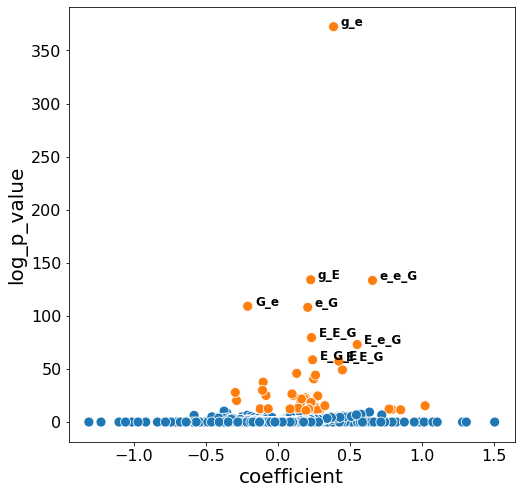

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.scatterplot(data=coef_df, x="coefficient", y="log_p_value", hue="significant", legend=False, ax=ax)
for line in range(0, top.shape[0]):
     plt.text(top.coefficient[line]+0.05, top.log_p_value[line]+0.5, top.index[line], horizontalalignment='left', size='large', color='black', weight='semibold')

In [77]:
sorted_df.to_csv("../results/phrase/LR/all_coefficients.tsv", sep="\t", index=True)

# References